In [7]:
# importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [8]:
pd.options.display.max_columns = None

In [9]:
pd.options.display.max_rows = 10

In [10]:
#Importing orders_products_customer_merge_spl.pkl
newpath = 'preparedData'

In [11]:
ords_prods_cust_merged_df= pd.read_pickle(os.path.join(newpath,'orders_products_customer_merge_spl.pkl'))

In [12]:
ords_prods_cust_merged_df.head()

,Unnamed: 0_x,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,Unnamed: 0_y,product_name,aisle_id,department_id,prices,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_order_frequency,order_frequency_flag,first_name,last_name,gender,state,age,date_joined,num_of_dependants,martital_status,income
0,0,2539329,1,prior,1,2,8,NaN,196,1,0,both,195,Soda,77,7,9.0,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,1,2398795,1,prior,2,3,7,15.0,196,1,1,both,195,Soda,77,7,9.0,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2,473747,1,prior,3,3,12,21.0,196,1,1,both,195,Soda,77,7,9.0,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,3,2254736,1,prior,4,4,7,29.0,196,1,1,both,195,Soda,77,7,9.0,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,4,431534,1,prior,5,4,15,28.0,196,1,1,both,195,Soda,77,7,9.0,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


# Creating a histogram of   " order_hour_of_day "

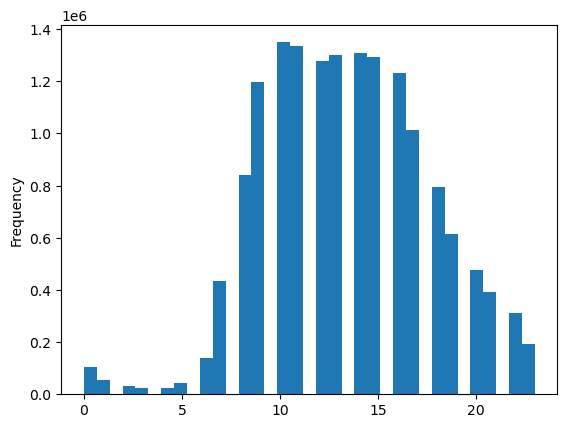

In [13]:
hist_order_hour_of_day =ords_prods_cust_merged_df['order_hour_of_day'].plot.hist(bins = 35)


Observation - The hours between 9 am and 4 pm is the peak period for placing orders whereas the hours between 1 am and 6 am are the lowest. there is a steady decrease the the orders placed after 4 pm.

In [14]:
#Exporting histogram order_hour_of_day
hist_order_hour_of_day.figure.savefig(os.path.join('04.Analysis', 'Visualizations', 'hist_order_hour_of_day'))


In [15]:
# Creating a bar chart from the "loyalty_flag" column 

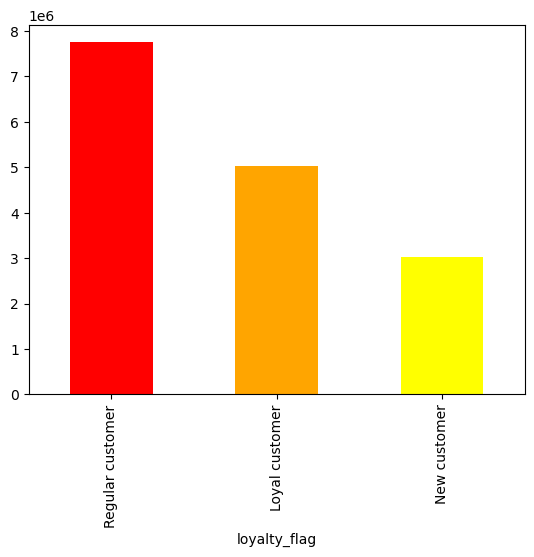

In [16]:
bar_loyalty_flag = ords_prods_cust_merged_df['loyalty_flag'].value_counts().plot.bar(color = ['red', 'orange', 'yellow'])


In [17]:
#Exporting bar graph
bar_loyalty_flag.figure.savefig(os.path.join('04.Analysis', 'Visualizations', 'bar_loyalty_flag.png'))


# Creating a line chart using sample data

In [18]:
#create sample from a list of random floating numbers 
np.random.seed(4)
dev = np.random.rand(len(ords_prods_cust_merged_df)) <= 0.7


In [19]:
dev

array([False,  True, False, ..., False,  True,  True])

In [21]:
# splitting the merged dataframe into big and small
big = ords_prods_cust_merged_df[dev]
small = ords_prods_cust_merged_df[~dev]

In [23]:
# checking size of merged
len(ords_prods_cust_merged_df)

15791657

In [24]:
# confirming the size of big + small
len(big) + len(small)

15791657

In [25]:
# working with the samples 
allmerged_df = small[['order_hour_of_day', 'prices']]

/Users/swathimanne/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/swathimanne/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/swathimanne/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/swathimanne/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

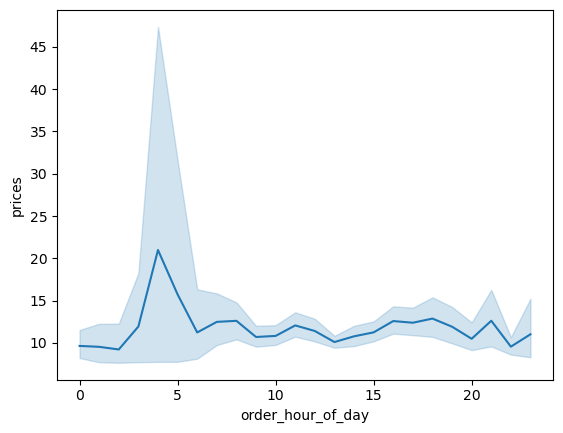

In [26]:
#creating the line graph
line_hour_of_day = sns.lineplot(data = allmerged_df, x = 'order_hour_of_day', y = 'prices')

In [27]:
#Exporting bar graph
line_hour_of_day.figure.savefig(os.path.join('04.Analysis', 'Visualizations', 'line_hour_of_day.png'))


# Create a line chart to determine connection between age and family situation

In [28]:
merged_df = small[['age', 'num_of_dependants']]

/Users/swathimanne/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/swathimanne/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/swathimanne/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/swathimanne/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

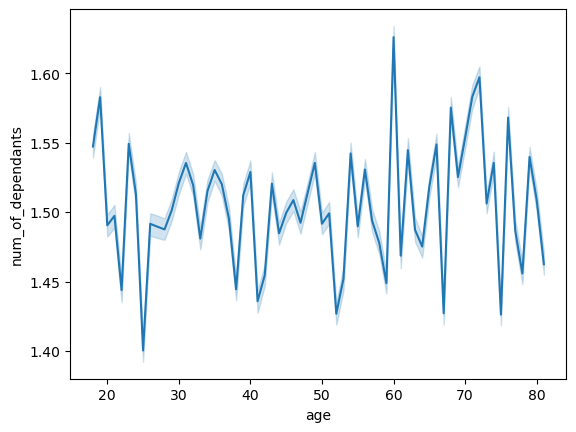

In [29]:
line_age_num_of_dependents = sns.lineplot(data = merged_df, x = 'age', y = 'num_of_dependants')


Observation - No correlation between age and the number of dependents

In [30]:
#exporting line_age_num_of_dependents
line_age_num_of_dependents.figure.savefig(os.path.join('04.Analysis', 'Visualizations', 'line_age_num_of_dependents.png'))


# Create a scatterplot between age and income

In [32]:
merged_df2 = small[['age', 'income']]


/Users/swathimanne/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/swathimanne/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


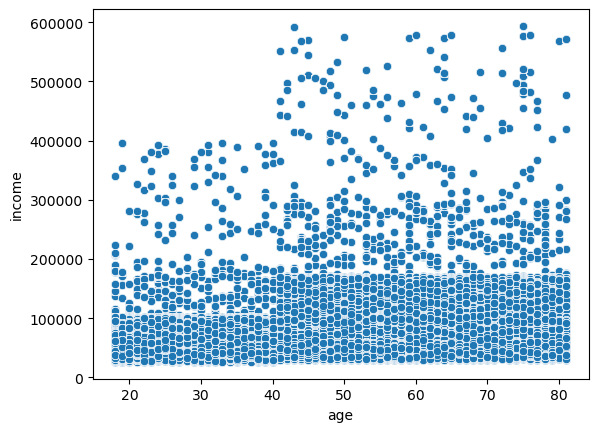

In [33]:
scatterplot_age_income = sns.scatterplot(x = 'age', y = 'income', data = merged_df2)


Observation - The scatterplot shows that majority of individuals remain under 200000 in regards to income however in older individuals aged 40-80 there are more outliers who have an much higher spending power over that of ages 20-39.
The scatterplot indicates correlation between age and income as the individuals over the age of 40 has potential earns when compared to other age groups. 

In [34]:
#exporting scatterplot_age_income
scatterplot_age_income.figure.savefig(os.path.join('04.Analysis', 'Visualizations', 'scatterplot_age_income.png'))
